In [143]:

"""
Data preprocessing 
First dealing with outliers, then with the missing values and finally with the categorical features 

"""



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [144]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [146]:
with open('Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [147]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [64]:
# At first, checking for outliers 

In [65]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

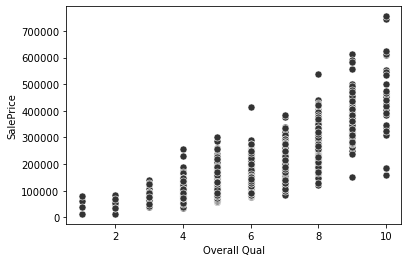

In [148]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df,marker="o",color=".2", s=50 )

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

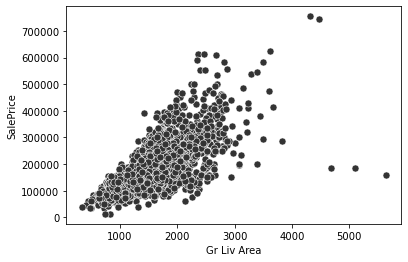

In [149]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df,marker="o",color=".2", s=50)

In [1]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df = df.drop(ind_drop,axis=0)


NameError: name 'df' is not defined

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

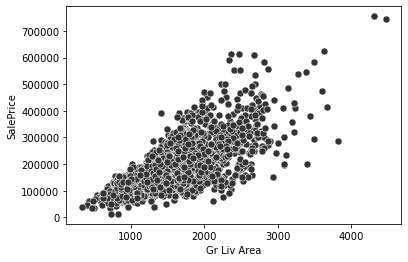

In [151]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df,marker="o",color=".2", s=50)

In [152]:
len(df.columns)

81

In [153]:
df = df.drop('PID',axis=1) # already have index 

In [154]:
'''
now dealing with mising values 
'''
def percentage_missing(df):
    percentage_NaN = 100* df.isnull().sum() / len(df)
    percentage_NaN = percentage_NaN[percentage_NaN>0].sort_values()
    return percentage_NaN


In [155]:
percentage_NaN = percentage_missing(df)

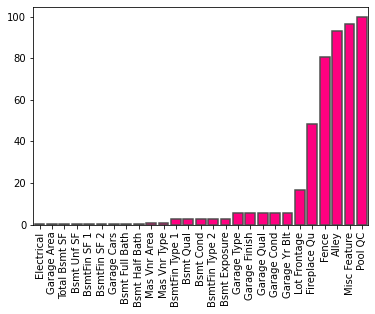

In [156]:

sns.barplot(x=percentage_NaN.index,y=percentage_NaN,linewidth=1.5, edgecolor=".3", facecolor=(1, 0, 0.5, 1))
plt.xticks(rotation=90);


feautures with missing percentage being less than 1
'''
sns.barplot(x=percentage_NaN.index,y=percentage_NaN)
plt.xticks(rotation=90);


plt.ylim(0,1)


In [1]:
percent_nan[ percentage_NaN < 1]

NameError: name 'percent_nan' is not defined

In [158]:
'''only one wow is missing'''
100/len(df)

0.0341646737273659

In [159]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [160]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [161]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [162]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [163]:
percentage_NaN = percentage_missing(df)

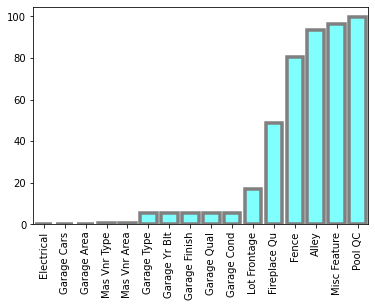

In [164]:
sns.barplot(x=percentage_NaN.index,y=percentage_NaN,linewidth=3.5, edgecolor=".5", facecolor=(0.5, 1, 1, 1))
plt.xticks(rotation=90);

In [165]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [166]:
percentage_NaN = percentage_missing(df)

(0.0, 1.0)

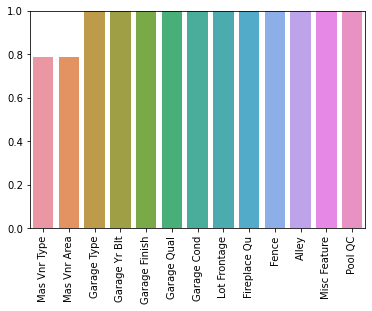

In [167]:
sns.color_palette("dark:#5A9_r", as_cmap=True)
sns.barplot(x=percentage_NaN.index,y=percentage_NaN,linewidth=5.5,)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [168]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [169]:
percentage_NaN = percentage_missing(df)

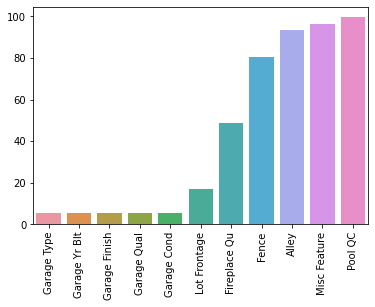

In [170]:
sns.color_palette("dark:#5A9_r", as_cmap=True)
sns.barplot(x=percentage_NaN.index,y=percentage_NaN)
plt.xticks(rotation=90);

In [171]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [172]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [173]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [174]:
percentage_NaN = percentage_missing(df)

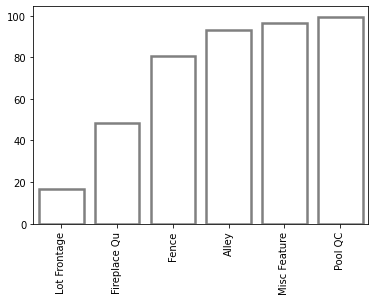

In [175]:

sns.barplot(x=percentage_NaN.index,y=percentage_NaN,linewidth=2.5, edgecolor=".5", facecolor=(1, 1, 1, 1))
plt.xticks(rotation=90);

In [176]:
percentage_NaN.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [177]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [178]:
percentage_NaN = percentage_missing(df)

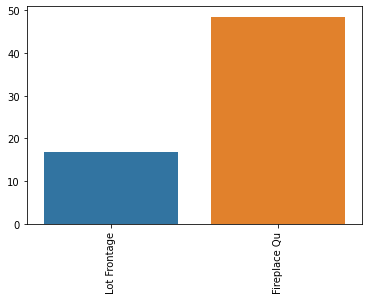

In [179]:
sns.barplot(x=percentage_NaN.index,y=percentage_NaN)
plt.xticks(rotation=90);

In [180]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [181]:
percentage_NaN = percentage_missing(df)

In [182]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [183]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2897,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2898,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2912,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [184]:
df.iloc[21:26]['Lot Frontage']

21    85.0
22     NaN
23     NaN
24     NaN
25    65.0
Name: Lot Frontage, dtype: float64

In [185]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [186]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean())).iloc[21:26]

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [187]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [188]:
percentage_NaN = percentage_missing(df)

In [189]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [190]:
percentage_NaN = percentage_missing(df)

In [191]:
percentage_NaN

Series([], dtype: float64)

In [192]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [193]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [194]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [195]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [196]:
final_dataframe = pd.concat([df_nums,df_objs],axis=1)

In [197]:
final_dataframe

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [198]:
final_dataframe.to_csv('AMES_final_dataframe.csv')